#  Part II - Presentation of Telecom Customer Churn Insights

## Chisom Promise Nnamani

## Investigation Overview

In this investigation, I'm most interested in figuring out what features affect customer churn more in the dataset. The main focus is how Data plan, Data usage, Monthly charge, Day minutes, and customer service calls determine if the customer will stay or leave the telecom company.

I will start with the distribution of churn, contract renewal and data plan features, then proceed to see how churn is being affected by data plan, contract renewal, monthly charges, and customer service calls.


## Dataset Overview

This dataset contains 3333 rows representing each customer, with 11 features or variables.

8 of the features which include (account_weeks, data_usage, customer_service_calls, day_mins, day_calls, monthly_charge, overage_fee. roam_mins) are numerical data types, while the other 3 which are (churn, contract_renewal, and data plan) are in categorical data type.

This dataset was sourced from Kaggle and can be obtained via this [link](https://www.kaggle.com/datasets/barun2104/telecom-churn)


**Important questions we expect to be answered via this presentation:**

 1. What features contribute more to customer churn?
 
 
 2. Who are the customers more likely to churn?
 

 3. What actions can be taken to stop them from leaving?

In [1]:
# import all packages to be used for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
customer_data = pd.read_csv('telecom_churn.csv')

### Column Description:

Each row represents a customer and each column contains attributes related to customer as described in the column description.

The “Churn” column is our target variable.

 - **Churn:** 1 if customer cancelled service, 0 if not
 
 
 - **AccountWeeks:** number of weeks customer has had active account
 
 
 - **ContractRenewal:** 1 if customer recently renewed contract, 0 if not
 
 
 - **DataPlan:** 1 if customer has data plan, 0 if not
 

 - **DataUsage:** gigabytes of monthly data usage
 

 - **CustServCalls:** number of calls into customer service
 

 - **DayMins:** average daytime minutes per month
 

 - **DayCalls:** average number of daytime calls
 

 - **MonthlyCharge:** average monthly bill
 

 - **OverageFee:** largest overage fee in last 12 months
 

 - **RoamMins:** average number of roaming minutes

In [3]:
# making copy of original data
customer_info = customer_data.copy()

In [4]:
# Seperate the column labels names that are made up two words with a an underscore
customer_info.rename(columns={'AccountWeeks': 'Account_Weeks', 'ContractRenewal': 'Contract_Renewal',
                              'DataPlan': 'Data_Plan', 'DataUsage': 'Data_Usage',
                              'CustServCalls': 'Customer_Service_Calls', 'DayMins': 'Day_Minutes', 'DayCalls': 'Day_Calls',
                              'MonthlyCharge': 'Monthly_Charge', 'OverageFee': 'Overage_Fee', 'RoamMins': 'Roam_Minutes'},
                     inplace = True)

# change the name of the column labels to lower case
customer_info.rename(columns=lambda x: x.lower(), inplace=True)

In [5]:
# change the value of the churn, contract_renewal, and data_plan for easy manipulation
customer_info['churn'] = np.where(customer_info['churn'] == 1, 'Left', 'Stayed')
customer_info['contract_renewal'] = np.where(customer_info['contract_renewal'] == 1, 'Renewed', 'Not Renewed')
customer_info['data_plan'] = np.where(customer_info['data_plan'] == 1, 'Yes', 'No')

In [6]:
# change churn, customer_renewal, and data__plan values into category data type
cat_col = ['churn', 'contract_renewal', 'data_plan']
customer_info[cat_col] = customer_info[cat_col].astype('category')

## Distribution of Churn

**For the 'Churn' variable: How high is the proportion of customers who left or stayed with the company?**

From the chart and the descriptive statistics of the "Churn" column below, we can see that **483(14.4%) customers were lost** by the telecom company, and **more than 2500(85.5%) were retained by the company**. 483 might seem a small number but that number could have fetch good profit for the Telecom company.

        churn
Stayed   2850
Left      483
            churn
Stayed  85.508551
Left    14.491449


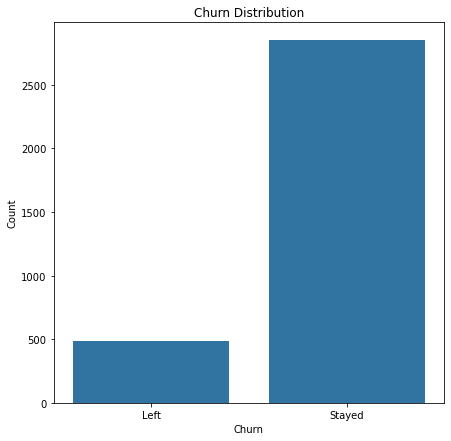

In [7]:
# let's get the value count of each churn value in a data frame
print(pd.DataFrame(customer_info['churn'].value_counts()))

# let's get the percentage of each churn value count
print(pd.DataFrame(customer_info['churn'].value_counts(normalize=True)*100))

color = sns.color_palette()[0]
plt.figure(figsize =(7,7))
sns.countplot(data=customer_info, x = 'churn', color=color);
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution');

## Distribution of Contract Renewal

**For the 'Contract Renewal' variable: How many customers recently or did not recently renew their contract?**

From the chart and the descriptive statistics of the "Contract Renewal" column below, we can see that **323(9.7%) customers did not recently renew their contract**, and **3010(90%) recently renewed their contract**. 

             contract_renewal
Renewed                  3010
Not Renewed               323
             contract_renewal
Renewed             90.309031
Not Renewed          9.690969


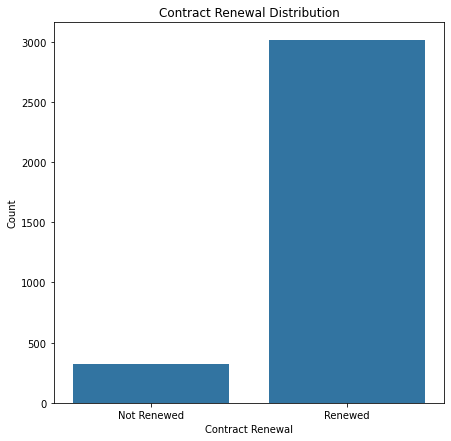

In [8]:
# let's get the value count of each contract renewal value in a data frame
print(pd.DataFrame(customer_info['contract_renewal'].value_counts()))

# let's get the percentage of each contract renewal value count
print(pd.DataFrame(customer_info['contract_renewal'].value_counts(normalize=True)*100))

color = sns.color_palette()[0]
plt.figure(figsize =(7,7))
sns.countplot(data=customer_info, x = 'contract_renewal', color=color);
plt.xlabel('Contract Renewal')
plt.ylabel('Count')
plt.title('Contract Renewal Distribution');

## Distribution of Data Plan

**For the 'Data Plan' variable: How many customers had data plan and how many did not?**

From the chart below, with the this descriptive statistics of the data plan column, we can see that only **922(27.6%) of the customers have** data plan while **2411(72%) of the customers do not** have data plan. 

     data_plan
No        2411
Yes        922
     data_plan
No   72.337234
Yes  27.662766


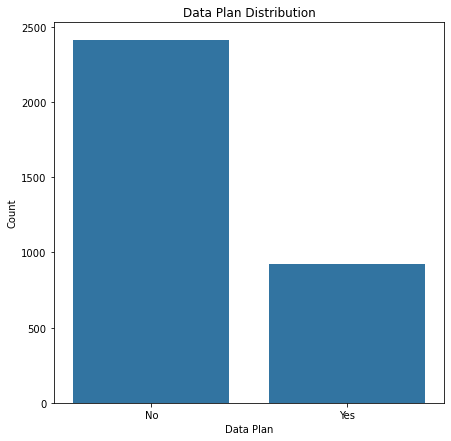

In [9]:
# let's get the value count of each data plan value in a data frame
print(pd.DataFrame(customer_info['data_plan'].value_counts()))

# let's get the percentage of each contract renewal value count
print(pd.DataFrame(customer_info['data_plan'].value_counts(normalize=True)*100))

base_color = sns.color_palette()[0]
plt.figure(figsize =(7,7))
sns.countplot(data = customer_info, x = 'data_plan', color=color);
plt.xlabel('Data Plan')
plt.ylabel('Count')
plt.title('Data Plan Distribution');

## Distribution of Data Usage

**What was the average data usage by the customers?**

The plot is skewed to the right, with the highest data usage value being 0 to 1. This means that about 2500 customers did not subscribe or use any data monthly.

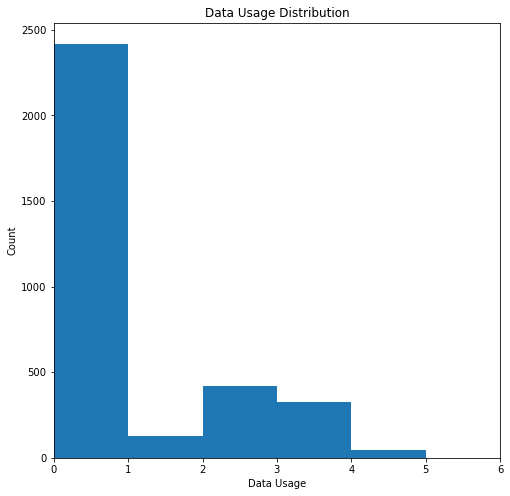

In [10]:
plt.figure(figsize= [8, 8])
bins = np.arange(0, customer_info['data_usage'].max()+1, 1);
plt.hist(data=customer_info, x='data_usage', bins = bins);
plt.xlim(0, 6);
plt.title('Data Usage Distribution')
plt.xlabel('Data Usage')
plt.ylabel('Count');

## Distribution of Monthly Charge

**What was the average monthly charge?**

The plot is slightly skewed to the right, with most of its customers (more than 800) being charged on average 40 to 60 dollars monthly.

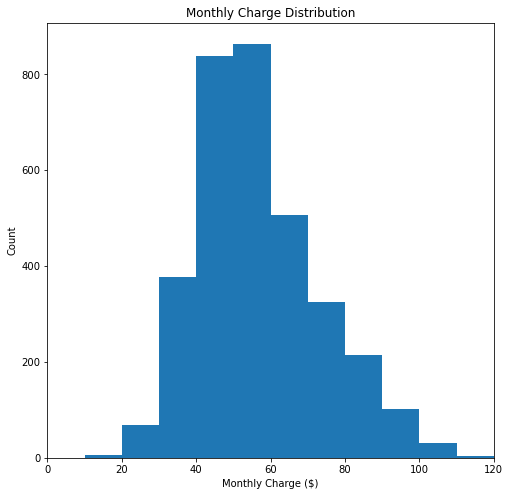

In [11]:
plt.figure(figsize= [8, 8]);
bins = np.arange(10, customer_info['monthly_charge'].max()+10, 10);
plt.hist(data=customer_info, x='monthly_charge', bins = bins);
plt.xlim(0, 120);
plt.title('Monthly Charge Distribution')
plt.xlabel('Monthly Charge ($)')
plt.ylabel('Count');

## Distribution of Customer Service Calls

For the customer service calls plot: The plot is skewed to the right, with about 1200 customers making up to 2 customer service calls per day.

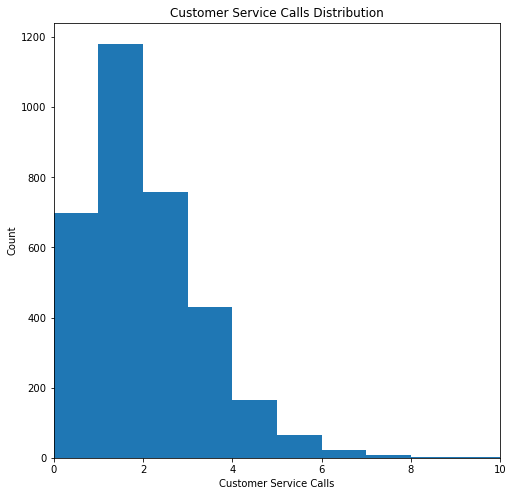

In [12]:
plt.figure(figsize= [8, 8]);
bins = np.arange(0, customer_info['customer_service_calls'].max()+1.1, 1);
plt.hist(data=customer_info, x='customer_service_calls', bins = bins);
plt.xlim(0, 10);
plt.title('Customer Service Calls Distribution')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count');

## Churn vs Data plan
Interesting insight! From our descriptive statistics which backs up our heatmaps plot, we could see that about **80(8.5%)** of the customers who had data plans were still lost by the company. But a higher percentage of **403(16.7%**) who did not have data plan were lost by the company. This graph and stattistics showed us that no data plan leads to customer churn.

And looking at the number of people who had no data plan but still stayed, about **2008(83%)** of them. That's a lot of profit waiting to be harnessed if we could convince these customers to buy data plans from the company.

In [13]:
# creating a function that plots a heatmap for two categorical variables
def heat_map(cat_1, cat_2):
    plt.figure(figsize = (8,7))
    # Use group_by() and size() to get number of values in each category
    ct_counts = customer_info.groupby([cat_1, cat_2]).size()

    # Use series.reset_index() to convert a series into a dataframe object
    ct_counts = ct_counts.reset_index(name='count')

    # Use DataFrame.pivot() to rearrange the data, to have data plan values on rows
    ct_counts = ct_counts.pivot(index = cat_1, columns = cat_2, values = 'count')
    
    # plot the heatmap
    sns.heatmap(ct_counts, annot = True, fmt = '.1f', cmap = 'viridis_r');
    plt.title('Heat map of {} vs {}'.format(cat_2.capitalize(), cat_1.capitalize()));
    plt.ylabel('{}'.format(cat_1.replace('_', ' ').capitalize()));
    plt.xlabel('{}'.format(cat_2.replace('_', ' ').capitalize()));

In [14]:
# let's use groupby to compare data plan and churn value counts
print(pd.DataFrame(customer_info.groupby('data_plan')['churn'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('data_plan')['churn'].value_counts(normalize=True)*100))

                  churn
data_plan              
No        Stayed   2008
          Left      403
Yes       Stayed    842
          Left       80
                      churn
data_plan                  
No        Stayed  83.284944
          Left    16.715056
Yes       Stayed  91.323210
          Left     8.676790


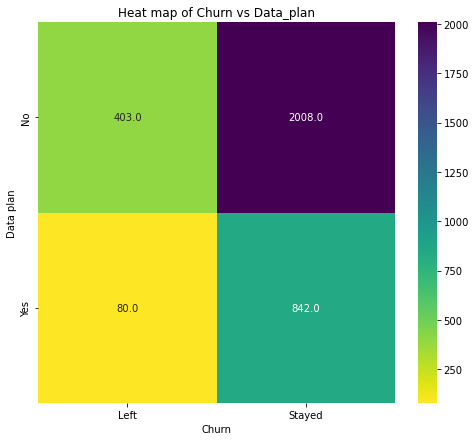

In [15]:
heat_map('data_plan', 'churn')

## Churn vs Contract renewal

From this descriptive statistics, we can see that about 137(42%) of the customers who did not recently renewed their contract were lost by the company, while only about 346(11%) of the customers who recently renwed their contract were lost by the company.

In [16]:
# let's use groupby to compare contract renewal and churn value counts
print(pd.DataFrame(customer_info.groupby('contract_renewal')['churn'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('contract_renewal')['churn'].value_counts(normalize=True)*100))

                         churn
contract_renewal              
Not Renewed      Stayed    186
                 Left      137
Renewed          Stayed   2664
                 Left      346
                             churn
contract_renewal                  
Not Renewed      Stayed  57.585139
                 Left    42.414861
Renewed          Stayed  88.504983
                 Left    11.495017


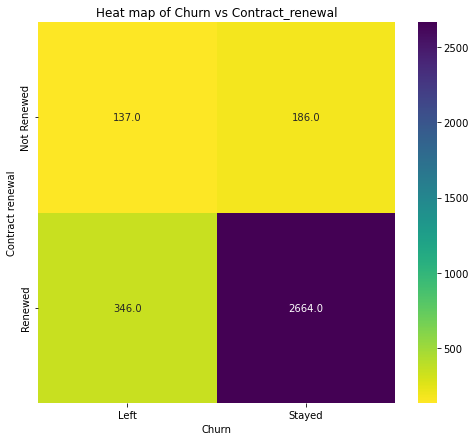

In [17]:
heat_map('contract_renewal', 'churn')

## Churn vs Data usage

We see both medians of the boxplots are at zero. If we go back to the data usage distribution, we could see that more than half of the customers weren't using any data.

So for the remaining number, the number of customers that use data and stayed with the company was higher than the number who left the company.

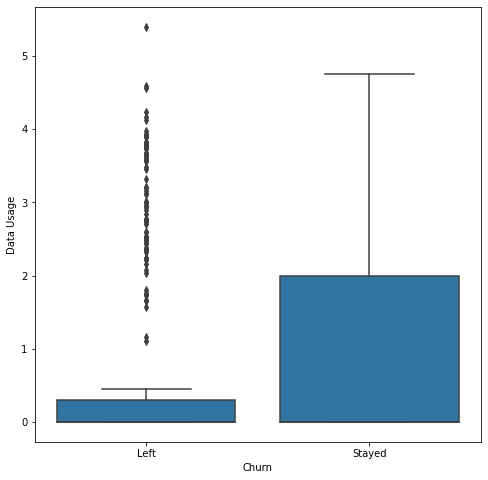

In [18]:
plt.figure(figsize=[8, 8])
sns.boxplot(data=customer_info, x='churn', y='data_usage', color=base_color)
plt.xticks(rotation=0)
plt.xlabel('Churn')
plt.ylabel('Data Usage');

## Data plan and Data Usage

The plot clearly shows that the customers with no data plan had no data usage had no data plan while the customers who had data plan were using data.

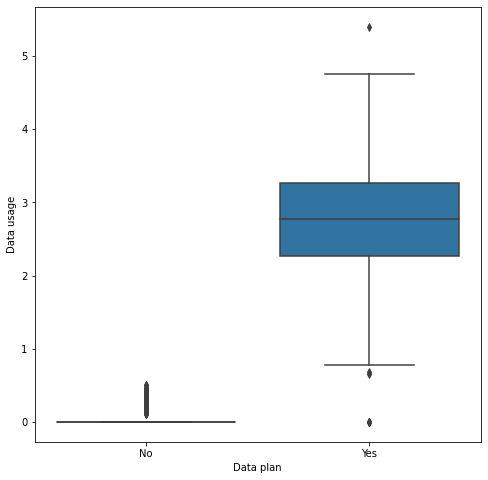

In [19]:
plt.figure(figsize=[8, 8])
sns.boxplot(data=customer_info, x='data_plan', y='data_usage', color=base_color)
plt.xticks(rotation=0)
plt.xlabel('Data plan')
plt.ylabel('Data usage');

In [20]:
def Relationship(num_var1, num_var2):
    sns.set(rc={"figure.figsize":(7, 7)})
    sns.regplot(data=customer_info, x=num_var1, y=num_var2, x_jitter=0.3, fit_reg=False, scatter_kws={'alpha':0.3})
    plt.title('{}'. format(num_var1 + ' vs '+ num_var2))

    if num_var1 == 'data_usage':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ').capitalize()));
    elif num_var1 == 'account_weeks':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ').capitalize()));
    elif num_var1 == 'customer_service_calls':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ').capitalize()));
    elif  num_var1 == 'day_minutes':
        plt.xlabel('{} (mins)'.format(num_var1.replace('_', ' ').capitalize()));
    elif num_var1 == 'day_calls':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ').capitalize()));
    elif num_var1 == 'roam_minutes':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ').capitalize()));
    elif num_var1 == 'roam_miutes':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ').capitalize()));
    else:
        plt.xlabel('{} ($)'.format(num_var1.replace('_', ' ').capitalize()));

    if num_var2 == 'data_usage':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ').capitalize()))
    elif num_var1 == 'account_weeks':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ').capitalize()))
    elif num_var1 == 'customer_service_calls':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ').capitalize()))
    elif  num_var1 == 'day_minutes':
        plt.ylabel('{} (mins)'.format(num_var2.replace('_', ' ').capitalize()))
    elif num_var1 == 'day_calls':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ').capitalize()))
    elif num_var1 == 'roam_minutes':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ').capitalize()))
    elif num_var1 == 'monthly_charge':
        plt.ylabel('{} ($)'.format(num_var2.replace('_', ' ').capitalize()))
    else:
        plt.ylabel('{} ($)'.format(num_var2.replace('_', ' ').capitalize()))

## Monthly Charge and Day Minutes

There is a high positive correlation between average day minutes and monthly charge. As average day mins increases, the monthly charge increases.

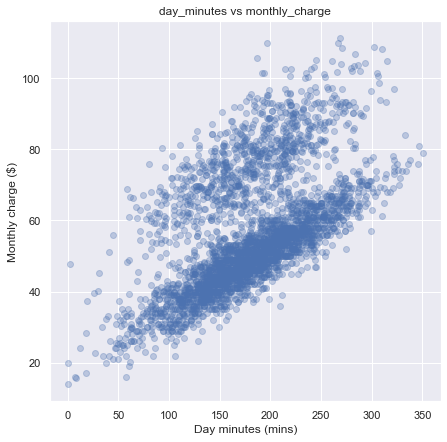

In [21]:
Relationship('day_minutes', 'monthly_charge')
plt.ylabel('Monthly charge ($)');

## Churn vs Data usage vs Monthly Charge

We could see that there is a positive correlation between data usage and monthly charge, and they both affect customer churn. We can also observe is that most customers with low to no data usage but received a high monthly charge left the company.

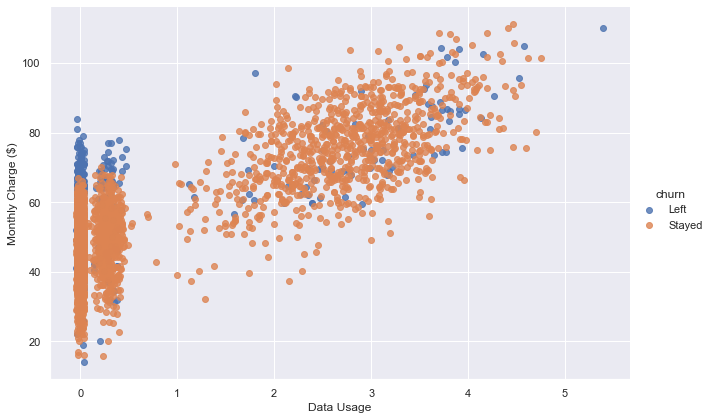

In [22]:
# Use color encodings to encode churn as the third variable

# Create scatterplot
g = sns.FacetGrid(data = customer_info, hue = 'churn', hue_order=['Left', 'Stayed'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'data_usage', 'monthly_charge', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Data Usage')
plt.ylabel('Monthly Charge ($)');

## Churn vs Day minutes vs Monthly Charge

From the scatter plot, it is clearly evident that there exists a correlation between day minutes and monthly charge, and Churn. Looking at the upper right, you will see customers leaving the company. This is being caused by high monthly charges which results from high average day minutes.

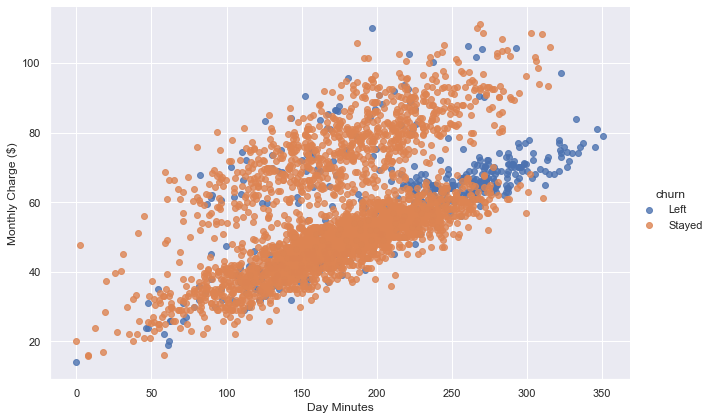

In [23]:
# Use color encodings to encode churn as the third variable

# create scatterplot
g = sns.FacetGrid(data = customer_info, hue = 'churn', hue_order=['Left', 'Stayed'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'day_minutes', 'monthly_charge', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Day Minutes');
plt.ylabel('Monthly Charge ($)');

## Churn vs Data plan vs Data Usage

Here we see again that the number of customers who had a data plan and then used data was more. But we could also see a higher percentage of them who had data plan with more data usage leaving the company.

In [24]:
# A function to create a bivariate barplot of two categorical variable and one numeric variable
def barplot(cat_var1, num_var, cat_var2):
    plt.figure(figsize = (7, 7))
    sns.barplot(data = customer_info, x = cat_var1, y = num_var, hue = cat_var2, errwidth = 0)
    plt.ylabel('{}'.format(num_var.replace('_', ' ').capitalize()));
    plt.xlabel('{}'.format(cat_var1.replace('_', ' ').capitalize()));

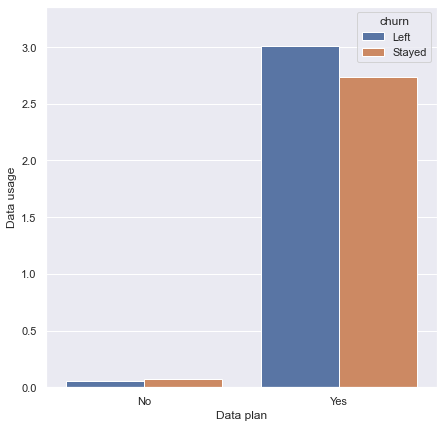

In [25]:
barplot('data_plan', 'data_usage', 'churn')

## Churn vs Data usage vs Contract renewal

We see that the number of customers who had a high data usage but did not renew their contract was more than the number who had data usage but renewed their contract. We also see the customers who did not renew their contract but had a high data usage leaving the company.

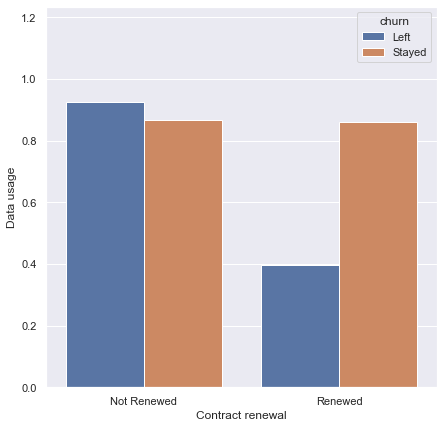

In [26]:
barplot('contract_renewal', 'data_usage', 'churn')

## Churn vs Data Plan vs Monthly Charge

Here, the bivariate barplot clearly shows that with the customers who had data plan, the number of customers who left the company due to high monthly charge were higher than the numbers who stayed.

Then in the customers who did not have data plan, the number of them who left the company due to high monthly charge were more than the customers who stayed.

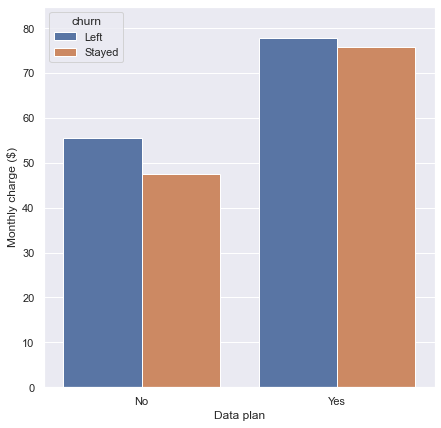

In [27]:
barplot('data_plan', 'monthly_charge', 'churn')
plt.ylabel('Monthly charge ($)');

## Churn vs Customer Servive Calls vs Contract Renewal

We could see that the customers recently renewed thier contract but made made more than 2 calls to the customer service, eventually left the company or cancelled the company's services.

Why did that happen? Mybe their issues not being resolved after the calls were made to made to the customer service or their issues weren't resolved within a small amount of time.

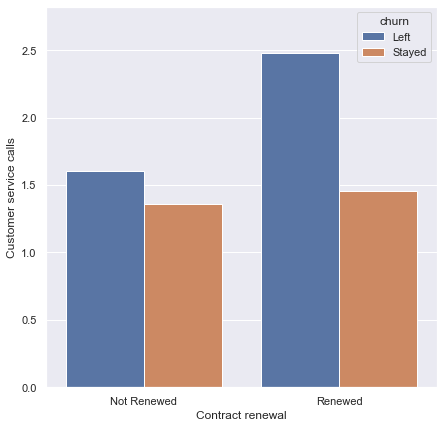

In [28]:
barplot('contract_renewal', 'customer_service_calls', 'churn')

**Generate Slideshow:** Once you're ready to generate your slideshow, use the jupyter nbconvert command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [29]:
!pip install jupyter_contrib_nbextensions

In [30]:
!jupyter nbconvert Part_II_Slide_Deck_Template.ipynb --to slides --post serve --no-input --no-prompt

^C


This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel.